Задача: Для диверсификации рекламы и коммуникацации с потенциальными клиентами требуется сегментирование (кластеризация) существующей базы по каким-либо признакам.

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

#Визуализация
import plotly.express as px

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,7)
import pylab

# Алгоритмы
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.cluster import DBSCAN

## 1. Первичный анализ данных

Прочитаем и откроем файл.

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

event_id                        date  \
0        092656bc-da3a-42b2-87b2-bc7349cf1e91  2020-08-18 00:00:01.065710   
1        4ee06cf5-24cc-478f-9acf-4e286516177f  2020-08-18 00:00:01.066429   
2        ddc54ec1-46de-48ee-b906-9d8ce3d64b37  2020-08-18 00:00:02.582822   
3        a34f5180-a533-4dd0-bb0c-a61bfb40b74a  2020-08-18 00:00:02.582836   
4        962ae9a7-b768-46e2-b9bd-48dcdc78d0d9  2020-08-18 00:00:03.225834   
...                                       ...                         ...   
4124729  a8545e1b-8f2f-4e57-af3c-7aa1a361b48f  2020-09-08 23:59:53.341022   
4124730  af2e6832-d289-47fd-a2f7-95a5d57e54d9  2020-09-08 23:59:53.447630   
4124731  7315fe32-aad9-4bf9-a33a-51ef41147c5e  2020-09-08 23:59:53.534833   
4124732  a0771c18-ec97-4420-a63a-c8042a3b8131  2020-09-08 23:59:53.795669   
4124733  ff5f62b0-b270-4482-8e47-90ab20ca1852  2020-09-08 23:59:54.218274   

                                    cookie_id  \
0        9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f   
1        9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f   
2        9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f   
3        9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f   
4        b82ab5d5-228b-4f41-89c4-4eb74bfb4653   
...                                       ...   
4124729  8c0027fc-150f-41d6-9806-c78d3f1c610e   
4124730  776d81f8-1b30-44af-b727-e7c69a5c3ac1   
4124731  776d81f8-1b30-44af-b727-e7c69a5c3ac1   
4124732  8c0027fc-150f-41d6-9806-c78d3f1c610e   
4124733  8c0027fc-150f-41d6-9806-c78d3f1c610e   

                                   session_id  \
0        f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323   
1        f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323   
2        f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323   
3        f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323   
4        8645bfcd-c7be-4014-9f83-0c78be8d1f21   
...                                       ...   
4124729  bf373079-7717-4460-99a5-a321ed017a01   
4124730  213d7401-91b4-4db9-862d-24f31520610a   
4124731  213d7401-91b4-4db9-862d-24f31520610a   
4124732  bf373079-7717-4460-99a5-a321ed017a01   
4124733  bf373079-7717-4460-99a5-a321ed017a01   

                                                event_type  \
0        read_block                                    ...   
1        read_block                                    ...   
2        read_block                                    ...   
3        read_block                                    ...   
4        read_block                                    ...   
...                                                    ...   
4124729  read_block                                    ...   
4124730  hover                                         ...   
4124731  click                                         ...   
4124732  read_block                                    ...   
4124733  read_block                                    ...   

                                    domain_id  
0        a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
1        a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
2        a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
3        a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
4        34308d56-1149-42a1-a0d9-5652c915ac9e  
...                                       ...  
4124729  a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
4124730  4915e85e-59db-475f-859d-e5f235ab7d0b  
4124731  4915e85e-59db-475f-859d-e5f235ab7d0b  
4124732  a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  
4124733  a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a  

[4124734 rows x 6 columns]

В таблице представлены данные о 4 124 734 действиях пользователей на сайтах клиента.\
В столбцах представлены следующие данные: 
1. уникальный идентификатор события (event_ id)
2. дата и время события (date)
3. уникальный ID пользователя (cookie_id)
4. уникальный идентификатор сессии, в рамках которой произошло событие (session_id)
5. сайт, на котором произошло событие (domain_id)
6. тип события (event_ type)

Посмотрим информацию по датасету.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124734 entries, 0 to 4124733
Data columns (total 6 columns):
event_id      object
date          object
cookie_id     object
session_id    object
event_type    object
domain_id     object
dtypes: object(6)
memory usage: 188.8+ MB


Столбец date имеет тип object. Чтобы иметь возможность работать с ним, нужно привести его к формату даты и времени.

In [5]:
data.date = pd.to_datetime(data.date)

Проверим таблицу на пропуски и количество уникальных значений.

In [6]:
data.describe()

event_id                        date  \
count                                4124734                     4124734   
unique                               4124734                     4116964   
top     3770c9ac-5aea-4419-a3fa-9f279320a336  2020-09-04 18:01:59.580912   
freq                                       1                           3   
first                                    NaN  2020-08-18 00:00:01.065710   
last                                     NaN  2020-09-08 23:59:54.218274   

                                   cookie_id  \
count                                4124734   
unique                                167122   
top     9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f   
freq                                  674858   
first                                    NaN   
last                                     NaN   

                                  session_id  \
count                                4124734   
unique                                240018   
top     222b2840-ff1c-47cf-ac5a-2f7f4eac3e0b   
freq                                  114720   
first                                    NaN   
last                                     NaN   

                                               event_type  \
count                                             4124734   
unique                                                 22   
top     read_block                                    ...   
freq                                              2541371   
first                                                 NaN   
last                                                  NaN   

                                   domain_id  
count                                4124734  
unique                                     9  
top     997d6180-cc73-4e0b-b02f-5e1e07211841  
freq                                 1179188  
first                                    NaN  
last                                     NaN

Представленны данные о действиях 167 122 людей на 9 разных сайтах на временном промежутке с 2020-08-18 по 2020-09-08 включительно.\
Всего человек мог совершать 22 разных типа действий.\
Строка count показывает, что пропусков в данных нет.

В столбце event_id все значения уникальные, он используется для индексирования действий пользователя. Для дальнейших вычислений его можно опустить.

In [7]:
data = data.drop(['event_id'], axis=1)

Столбец event_type имеет некорректное количество символов, поэтому ограничим их до 33

In [8]:
data.event_type = data.event_type.str[:33]

Ниже представлен график использования сайтов. Спрос на три сайта сильно превышает спрос на остальные.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

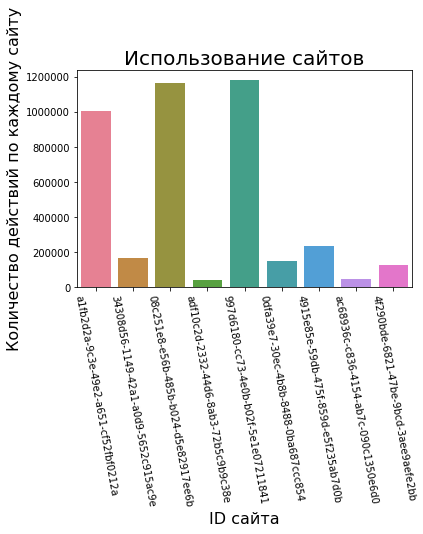

In [9]:
fig = sns.countplot(x='domain_id', palette="husl", data = data)\


plt.title('Использование сайтов',fontsize = 20)
plt.xlabel('ID сайта', fontsize=16)
plt.ylabel('Количество действий по каждому сайту', fontsize=16)
plt.xticks(rotation=-80) 

Построим график, который отображает, как часто выполняется то или иное действие. Самое выполняемое = read_block.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

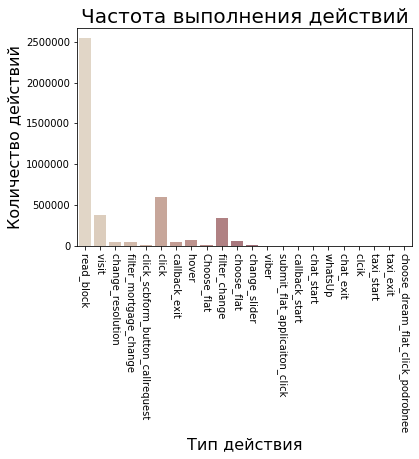

In [10]:
fig = sns.countplot(x='event_type', palette="ch:.25", data = data)


plt.title('Частота выполнения действий',fontsize = 20)
plt.xlabel('Тип действия', fontsize=16)
plt.ylabel('Количество действий', fontsize=16)
plt.xticks(rotation=-90) 

Теперь нужно выделить дополнительные признаки. Создадим дополнительную таблицу session, которая описывает параметры сессий. Время начала и конца сессии определим как время появления соответственно первого и последнего события в этой сессии. Дополнительно определим количество действий за сессию.\
Чтобы правильно определить начало и конец сессии, отсортируем данные по столбцам session_id и date.

In [11]:
session = data[['session_id', 'date', 'event_type']].sort_values(by=['session_id','date'])

In [12]:
session.head(5)

session_id                       date  \
2997799  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:27:57.202836   
2997808  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:27:58.179775   
2997826  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:28:01.743619   
2997990  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:28:34.879357   
1330278  0001104c-7fff-49d1-b81c-c81b3b237223 2020-08-23 07:45:20.136457   

                                event_type  
2997799  visit                              
2997808  read_block                         
2997826  read_block                         
2997990  callback_exit                      
1330278  visit

Сгруппируем по session_id.

In [13]:
session = session.groupby(['session_id']).agg({'date' :[min, max], 'event_type': 'count'})\
.reset_index()
session.columns = ['session_id','date_session_begin','date_session_end','amount_of_events']

In [14]:
session.head(5)

session_id         date_session_begin  \
0  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:27:57.202836   
1  0001104c-7fff-49d1-b81c-c81b3b237223 2020-08-23 07:45:20.136457   
2  0001cf03-b16b-429e-9253-77c47ca1ac58 2020-08-20 20:12:32.398167   
3  00023cd3-5312-4eab-b26c-7a8ddacdc49d 2020-08-26 16:35:34.135417   
4  00025633-c0f7-4c84-978a-3edd9d2d052d 2020-08-26 11:43:27.076307   

            date_session_end  amount_of_events  
0 2020-09-01 14:28:34.879357                 4  
1 2020-08-23 07:46:01.265339                11  
2 2020-08-20 20:12:53.625739                 9  
3 2020-08-26 16:40:35.782342                32  
4 2020-08-26 11:46:30.359646                 8

Определим время длительности сессии в секундах.

In [15]:
session['session_time'] = (session.date_session_end - session.date_session_begin).dt.total_seconds()/60
session['session_date'] = session.date_session_begin.dt.date

In [16]:
session.head(5)

session_id         date_session_begin  \
0  0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:27:57.202836   
1  0001104c-7fff-49d1-b81c-c81b3b237223 2020-08-23 07:45:20.136457   
2  0001cf03-b16b-429e-9253-77c47ca1ac58 2020-08-20 20:12:32.398167   
3  00023cd3-5312-4eab-b26c-7a8ddacdc49d 2020-08-26 16:35:34.135417   
4  00025633-c0f7-4c84-978a-3edd9d2d052d 2020-08-26 11:43:27.076307   

            date_session_end  amount_of_events  session_time session_date  
0 2020-09-01 14:28:34.879357                 4      0.627942   2020-09-01  
1 2020-08-23 07:46:01.265339                11      0.685481   2020-08-23  
2 2020-08-20 20:12:53.625739                 9      0.353793   2020-08-20  
3 2020-08-26 16:40:35.782342                32      5.027449   2020-08-26  
4 2020-08-26 11:46:30.359646                 8      3.054722   2020-08-26

Посмотрим на среднюю длительность сессии по дням. Видно, что в конце августа сессии были в целом дольше, чем в начале сентября. Скорее всего это связанно с периодом конца отпусков и началом учебного года.

In [17]:
session1 = session[['session_date','session_time']].groupby('session_date', as_index=False).mean()
fig = px.line(session1, x='session_date', y="session_time", title = 'Средняя длительность сессий по дням')
fig.show()

Ниже представлен график зависимости количества действий и времени сессии. В целом, данные скоррелированны, однако имеются и выбросы.

(0, 2500)

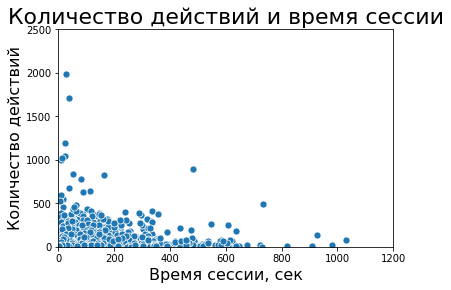

In [18]:
fig = sns.scatterplot(data=session, x="session_time", y="amount_of_events", s=50)

plt.title('Количество действий и время сессии',fontsize = 22)
plt.xlabel('Время сессии, сек', fontsize=16)
plt.ylabel('Количество действий', fontsize=16)

pylab.xlim (0, 1200)
pylab.ylim (0, 2500)

Вычислим дату начала сессии в часах с первого события в датасете.

In [19]:
first = data.date.min()

In [20]:
session['begin'] = (session.date_session_begin - first).dt.total_seconds()/60/60

In [21]:
session

session_id         date_session_begin  \
0       0000e7b6-a223-459d-ae31-8de012cd904e 2020-09-01 14:27:57.202836   
1       0001104c-7fff-49d1-b81c-c81b3b237223 2020-08-23 07:45:20.136457   
2       0001cf03-b16b-429e-9253-77c47ca1ac58 2020-08-20 20:12:32.398167   
3       00023cd3-5312-4eab-b26c-7a8ddacdc49d 2020-08-26 16:35:34.135417   
4       00025633-c0f7-4c84-978a-3edd9d2d052d 2020-08-26 11:43:27.076307   
...                                      ...                        ...   
240013  fffec8cf-4d33-44b0-a59a-e49668f7527b 2020-08-24 05:36:21.498503   
240014  fffed267-9fb7-4356-9c24-24272776266e 2020-09-01 14:23:11.751635   
240015  ffff3dca-d57b-4acd-8706-545fa6f97a13 2020-08-31 13:00:47.676133   
240016  ffff6fd2-cc5a-4edb-8d13-ce1fb0b3b7a5 2020-08-18 13:03:00.459443   
240017  ffff757b-d68f-4008-9ee5-22ab4782ccd8 2020-08-20 12:00:18.205092   

                 date_session_end  amount_of_events  session_time  \
0      2020-09-01 14:28:34.879357                 4      0.627942   
1      2020-08-23 07:46:01.265339                11      0.685481   
2      2020-08-20 20:12:53.625739                 9      0.353793   
3      2020-08-26 16:40:35.782342                32      5.027449   
4      2020-08-26 11:46:30.359646                 8      3.054722   
...                           ...               ...           ...   
240013 2020-08-24 05:36:21.498503                 1      0.000000   
240014 2020-09-01 14:23:32.721424                 6      0.349496   
240015 2020-08-31 13:00:47.676133                 1      0.000000   
240016 2020-08-18 13:04:34.176003                 8      1.561943   
240017 2020-08-20 12:03:30.982447                10      3.212956   

       session_date       begin  
0        2020-09-01  350.465594  
1        2020-08-23  127.755297  
2        2020-08-20   68.208703  
3        2020-08-26  208.592519  
4        2020-08-26  203.723892  
...             ...         ...  
240013   2020-08-24  149.605676  
240014   2020-09-01  350.386302  
240015   2020-08-31  325.012947  
240016   2020-08-18   13.049832  
240017   2020-08-20   60.004761  

[240018 rows x 7 columns]

Добавим еще некоторые переменные, по которым можно проанализировать количество сессий по числам, часам, дням недели.

In [22]:
session['month'] = session.date_session_begin.dt.month
session['day'] = session.date_session_begin.dt.day
session['weekday'] = session.date_session_begin.dt.weekday
session['hour'] = session.date_session_begin.dt.hour
session['minute'] = session.date_session_begin.dt.minute

По графикам ниже можно заметить некоторые особенности сессий:
1. Больше всего сессий происходит по вторникам
2. Большинство сессий происходит в период с 7 утра до 5 вечера.

Text(0, 0.5, 'Количество сессий')

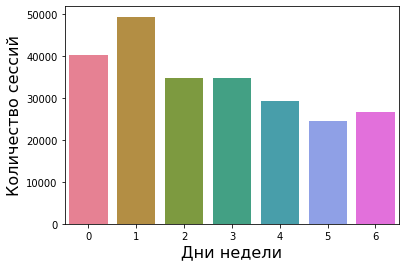

In [23]:
fig = sns.countplot(x='weekday', palette='husl', data = session)

plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Количество сессий', fontsize=16)

Text(0, 0.5, 'Количество сессий')

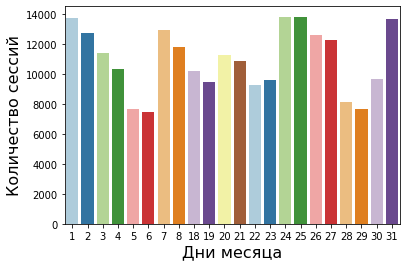

In [24]:
fig = sns.countplot(x='day', palette='Paired', data = session)

plt.xlabel('Дни месяца', fontsize=16)
plt.ylabel('Количество сессий', fontsize=16)

Text(0, 0.5, 'Количество сессий')

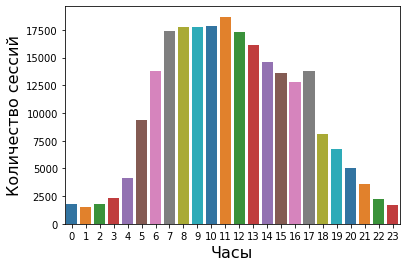

In [25]:
fig = sns.countplot(x='hour', palette='tab10', data = session)


plt.xlabel('Часы', fontsize=16)
plt.ylabel('Количество сессий', fontsize=16)

Осталось объединить датасет session и data по столбцу session_id.

In [26]:
new_data = data.merge(session, how='left')

Категориальные признаки domain_id, event_type и session_id необходимо привести к численному виду, т.е. факторизовать.

In [27]:
new_data.domain_id = pd.factorize(new_data.domain_id)[0]
new_data['event_type'] = pd.factorize(new_data.event_type)[0]
new_data['session_id'] = pd.factorize(new_data.session_id)[0]
new_data['cookie_id_factorized'] = pd.factorize(new_data.cookie_id)[0]

In [28]:
new_data = new_data.drop(['date','date_session_begin','date_session_end','session_date'], axis = 1)
new_data.head(5)

cookie_id  session_id  event_type  domain_id  \
0  9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f           0           0          0   
1  9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f           0           0          0   
2  9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f           0           0          0   
3  9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f           0           0          0   
4  b82ab5d5-228b-4f41-89c4-4eb74bfb4653           1           0          1   

   amount_of_events  session_time   begin  month  day  weekday  hour  minute  \
0            109547   1375.905296  0.0000      8   18        1     0       0   
1            109547   1375.905296  0.0000      8   18        1     0       0   
2            109547   1375.905296  0.0000      8   18        1     0       0   
3            109547   1375.905296  0.0000      8   18        1     0       0   
4                28     37.198734  0.0006      8   18        1     0       0   

   cookie_id_factorized  
0                     0  
1                     0  
2                     0  
3                     0  
4                     1

Напоследок построим корреляционную матрицу и посмотрим, как признаки коррелируют меджу собой.

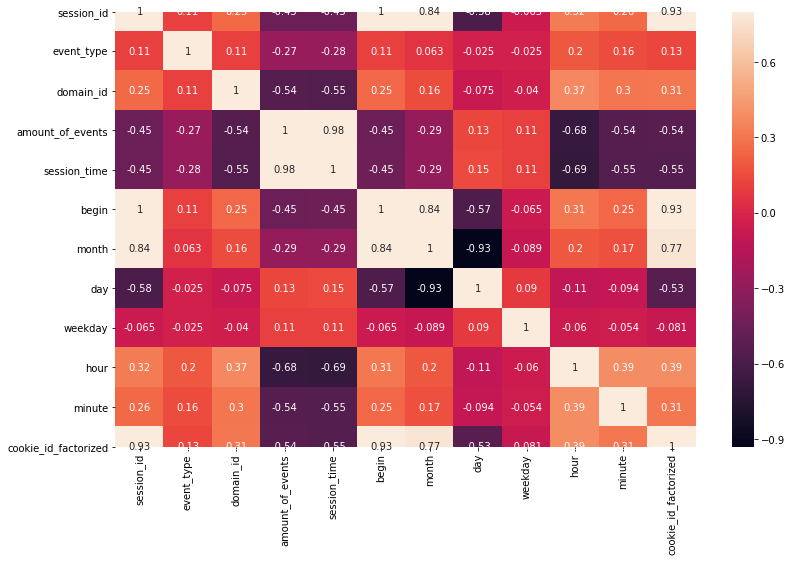

In [29]:
corrmat = new_data.corr()
f, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(corrmat, vmax=.8, annot=True)

Получилось 12 числовых признаков, которые можно использовать для кластеризации.

## 2. Подготовка данных для кластеризации сессий

Матрица признаков:

In [30]:
X = new_data.drop(['cookie_id'], axis=1)
X

session_id  event_type  domain_id  amount_of_events  session_time  \
0                 0           0          0            109547   1375.905296   
1                 0           0          0            109547   1375.905296   
2                 0           0          0            109547   1375.905296   
3                 0           0          0            109547   1375.905296   
4                 1           0          1                28     37.198734   
...             ...         ...        ...               ...           ...   
4124729      240016           0          0                11      1.650271   
4124730      240013           7          6                31      3.274149   
4124731      240013           5          6                31      3.274149   
4124732      240016           0          0                11      1.650271   
4124733      240016           0          0                11      1.650271   

              begin  month  day  weekday  hour  minute  cookie_id_factorized  
0          0.000000      8   18        1     0       0                     0  
1          0.000000      8   18        1     0       0                     0  
2          0.000000      8   18        1     0       0                     0  
3          0.000000      8   18        1     0       0                     0  
4          0.000600      8   18        1     0       0                     1  
...             ...    ...  ...      ...   ...     ...                   ...  
4124729  527.970593      9    8        1    23      58                167007  
4124730  527.943339      9    8        1    23      56                167118  
4124731  527.943339      9    8        1    23      56                167118  
4124732  527.970593      9    8        1    23      58                167007  
4124733  527.970593      9    8        1    23      58                167007  

[4124734 rows x 12 columns]

Для того, чтобы снизить влияние разных пределов значений признаков, их необходимо масштабировать.

А для того, чтобы использовать дальнейшие алгоритмы, матрицу признаков надо центрировать (среднее значение каждого признака примерно равно нолю).

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_centered = X_scaled - X_scaled.mean(axis=0)
X_centered.columns = ['session_id','event_type','domain_id','amount_of_events','session_time','begin',\
                      'month','day','weekday','hour','minute','cookie_id_factorized']

In [32]:
X_centered

session_id  event_type  domain_id  amount_of_events  session_time  \
0         -1.435756   -0.632314  -1.255073          2.602566      2.266721   
1         -1.435756   -0.632314  -1.255073          2.602566      2.266721   
2         -1.435756   -0.632314  -1.255073          2.602566      2.266721   
3         -1.435756   -0.632314  -1.255073          2.602566      2.266721   
4         -1.435743   -0.632314  -0.779842         -0.433130     -0.393027   
...             ...         ...        ...               ...           ...   
4124729    1.871178   -0.632314  -1.255073         -0.433601     -0.463655   
4124730    1.871137    1.643827   1.596317         -0.433047     -0.460429   
4124731    1.871137    0.993501   1.596317         -0.433047     -0.460429   
4124732    1.871178   -0.632314  -1.255073         -0.433601     -0.463655   
4124733    1.871178   -0.632314  -1.255073         -0.433601     -0.463655   

            begin     month       day   weekday      hour    minute  \
0       -1.468027 -0.660402  0.025188 -0.849054 -1.678366 -1.306515   
1       -1.468027 -0.660402  0.025188 -0.849054 -1.678366 -1.306515   
2       -1.468027 -0.660402  0.025188 -0.849054 -1.678366 -1.306515   
3       -1.468027 -0.660402  0.025188 -0.849054 -1.678366 -1.306515   
4       -1.468023 -0.660402  0.025188 -0.849054 -1.678366 -1.306515   
...           ...       ...       ...       ...       ...       ...   
4124729  1.894648  1.514230 -1.024909 -0.849054  2.223335  1.785759   
4124730  1.894475  1.514230 -1.024909 -0.849054  2.223335  1.679129   
4124731  1.894475  1.514230 -1.024909 -0.849054  2.223335  1.679129   
4124732  1.894648  1.514230 -1.024909 -0.849054  2.223335  1.785759   
4124733  1.894648  1.514230 -1.024909 -0.849054  2.223335  1.785759   

         cookie_id_factorized  
0                   -1.243550  
1                   -1.243550  
2                   -1.243550  
3                   -1.243550  
4                   -1.243531  
...                       ...  
4124729              1.852592  
4124730              1.854650  
4124731              1.854650  
4124732              1.852592  
4124733              1.852592  

[4124734 rows x 12 columns]

### 2.1 Снижение размерности

#### Метод главных компонент (PCA)

PCA помогает выразить несколько признаков через один, что позволяет работать с более простой моделью.

PCA аппроксимирует n-размерное облако наблюдений до эллипсоида (тоже n-мерного), полуоси которого и будут являться будущими главными компонентами. И при проекции на такие оси (снижении размерности) сохраняется наибольшее количество информации.

In [33]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

Результатом является 2-мерное пространство, которое можно легко визуализировать.

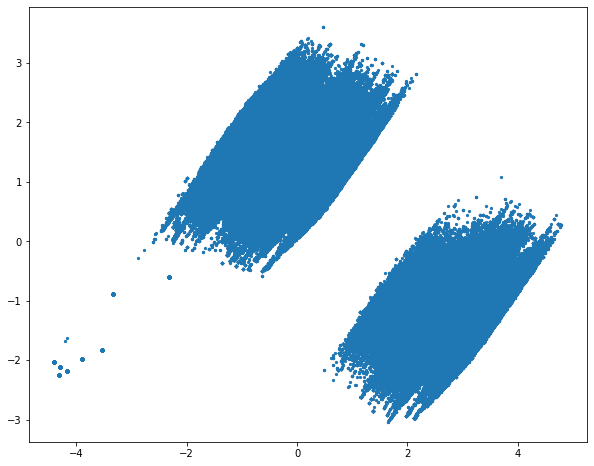

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=5)
plt.title("")
plt.show()

## 3. Кластеризация сессий алгоритмом K-means

График выше показывает, как можно кластеризовать данные по сессиям. Отлично видны кластеры, которые можно разделить с помощью алгоритма К-средних (K-means).

Краткое описание работы алгоритма:
1. Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся".

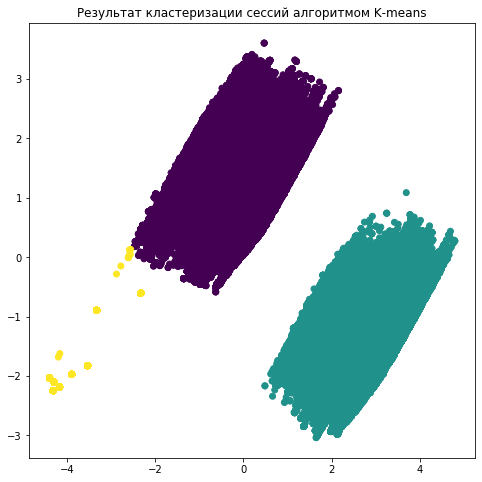

In [35]:
y_pred_kmeans = KMeans(n_clusters=3, random_state=42 ).fit_predict(X_pca)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans)
plt.title("Результат кластеризации сессий алгоритмом K-means")
plt.show()

## 4. Подготовка данных для кластеризации пользователей

Полученый результат кластеризации сессий можно использовать для кластеризации пользователей.
Сопоставим результат классификации сессий и идентификатор пользователя.

In [36]:
result_session = pd.DataFrame()
result_session['cookie_id'] = data.cookie_id
result_session['session_id_class'] = y_pred_kmeans

In [37]:
result1 = result_session.groupby('cookie_id', as_index=False).mean()

In [38]:
result1.session_id_class.value_counts()

0.000000    105905
1.000000     58017
0.500000        87
0.333333        49
0.666667        40
             ...  
0.233333         1
0.914634         1
0.006897         1
0.282609         1
0.307876         1
Name: session_id_class, Length: 1540, dtype: int64

После группировки по идентификаторам пользователя стало видно, что часть пользователей может быть однозначно отнесена к двум выделенным классам: 105 906 человек к классу "0", 58 017 человек к классу "1".

Уже выделенные в кластеры пользователи:

In [39]:
done = result1.loc[(result1.session_id_class == 0.0) | (result1.session_id_class == 1.0)]
done

cookie_id  session_id_class
0       00005f21-038c-476b-a8b4-5de3c0886d5f               0.0
1       000160cf-c453-4443-a992-37a776116a37               0.0
2       0001eba3-0308-473f-aac8-ae7af76d04a6               0.0
3       00033f18-eccf-4b6b-9bb9-659658bc445a               1.0
4       00038c7b-f158-4789-a598-2290fd46afea               0.0
...                                      ...               ...
167117  fffe5724-d548-4cc6-a54c-bc456afd2f8b               0.0
167118  fffee79b-67b9-4d2c-9a43-5f240cc3d448               0.0
167119  ffff0cdd-9cab-4f94-a587-a8562d880b10               0.0
167120  ffff21bf-6fc5-40c7-aea5-87c0194ac0c2               1.0
167121  ffff6957-fb3d-43b8-b3a2-e5d78d63d75c               0.0

[163922 rows x 2 columns]

163 922 пользователей уже кластеризованы.

Оставшиеся пользователи:

In [40]:
remain = result1.loc[(result1.session_id_class != 0.0) & (result1.session_id_class != 1.0)]
remain

cookie_id  session_id_class
44      00103b4c-f028-46f5-8586-ec0892372816          0.486486
184     0041f39e-5923-485c-a655-02e319a46207          0.409091
199     0048491f-5de0-43e7-8cf3-ca3d02f3046c          0.694444
203     004a53a8-ca04-45e4-a647-6002602fab2c          0.166667
300     007052ce-b7d7-4079-8c49-4a6f3dc7862f          0.166667
...                                      ...               ...
166646  ff4d5461-cf10-4045-8da7-5d5efdee605f          0.404762
166673  ff567ffd-0153-461e-94de-a012c5fcb99f          0.752252
166760  ff79b885-fb38-45e4-a653-cf5338a92388          0.682927
166831  ff922007-0320-47f8-88f8-eda4cbd46ce8          0.250000
167038  ffdd7e90-08ee-4349-8c63-090d32cf992f          0.166667

[3200 rows x 2 columns]

Остается 3 200 человек, которых надо кластеризовать.

In [41]:
X = new_data.drop(['cookie_id_factorized'], axis=1).groupby('cookie_id', as_index=False).mean()
X

cookie_id     session_id  event_type  \
0       00005f21-038c-476b-a8b4-5de3c0886d5f   26817.428571    1.000000   
1       000160cf-c453-4443-a992-37a776116a37  102145.000000    4.750000   
2       0001eba3-0308-473f-aac8-ae7af76d04a6   78108.000000    1.785714   
3       00033f18-eccf-4b6b-9bb9-659658bc445a  205437.000000    0.200000   
4       00038c7b-f158-4789-a598-2290fd46afea   28558.000000    0.315789   
...                                      ...            ...         ...   
167117  fffe5724-d548-4cc6-a54c-bc456afd2f8b   37240.000000    0.083333   
167118  fffee79b-67b9-4d2c-9a43-5f240cc3d448   46568.000000    2.000000   
167119  ffff0cdd-9cab-4f94-a587-a8562d880b10  140175.000000    0.500000   
167120  ffff21bf-6fc5-40c7-aea5-87c0194ac0c2  217597.000000    0.250000   
167121  ffff6957-fb3d-43b8-b3a2-e5d78d63d75c   46129.000000    0.555556   

        domain_id  amount_of_events  session_time       begin  month   day  \
0             5.0          4.142857      1.496200   61.204353    8.0  20.0   
1             2.0          4.000000      1.099283  222.528378    8.0  27.0   
2             4.0         14.000000     19.088786  176.739894    8.0  25.0   
3             4.0          5.000000      3.018349  447.115096    9.0   5.0   
4             4.0         19.000000      1.624205   63.643650    8.0  20.0   
...           ...               ...           ...         ...    ...   ...   
167117        2.0         12.000000      1.157890   84.969340    8.0  21.0   
167118        4.0         27.000000      2.562974  108.396974    8.0  22.0   
167119        2.0          4.000000      6.246299  318.682220    8.0  31.0   
167120        2.0          4.000000      0.154863  487.367620    9.0   7.0   
167121        4.0         18.000000      3.852382  107.668254    8.0  22.0   

        weekday       hour     minute  
0           3.0  12.571429  37.428571  
1           3.0   6.000000  31.000000  
2           1.0   8.000000  44.000000  
3           5.0  15.000000   6.000000  
4           3.0  15.000000  38.000000  
...         ...        ...        ...  
167117      4.0  12.000000  58.000000  
167118      5.0  12.000000  23.000000  
167119      0.0   6.000000  40.000000  
167120      0.0   7.000000  22.000000  
167121      5.0  11.000000  40.000000  

[167122 rows x 12 columns]

In [42]:
new_X = remain.merge(X, how='left')
new_X = new_X.drop(['session_id_class','cookie_id'], axis=1)

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_X)
X_scaled = pd.DataFrame(X_scaled)
X_centered = X_scaled - X_scaled.mean(axis=0)
X_centered.columns = ['session_id','event_type','domain_id','amount_of_events','session_time','begin',\
                      'month','day','weekday','hour','minute']

Снова используем метод PCA.

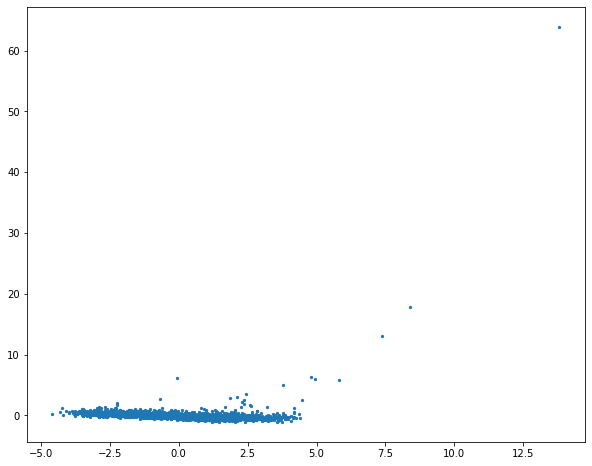

In [44]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=5)
plt.title("")
plt.show()

Этот метод не дает такого же четкого разделения на кластеры.

Попробуем использовать метод t-SNE (t-distributed stochastic neighbor embedding).

t-SNE — техника нелинейного снижения размерности и визуализации многомерных переменных. Этот алгоритм может свернуть сотни измерений к меньшему количеству, сохраняя при этом важные отношения между данными: чем ближе объекты располагаются в исходном пространстве, тем меньше расстояние между этими объектами в пространстве сокращенной размерности. Метод эффективен для маленьких и средних объемов данных.

In [45]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_pca)

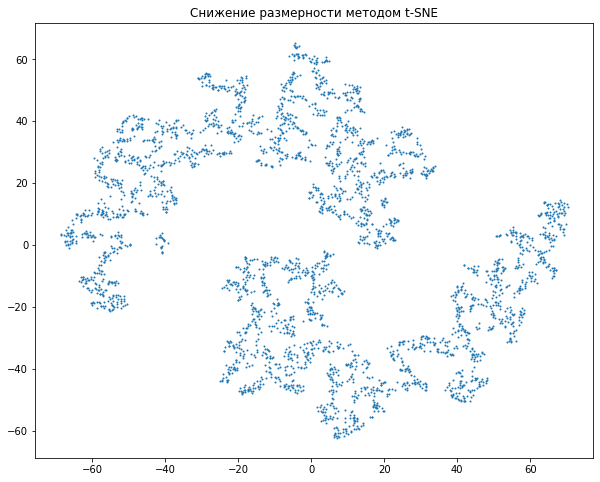

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],s=1)
plt.title("Cнижение размерности методом t-SNE")
plt.show()

Теперь здесь четко видны кластеры, которые попробуем кластеризовать алгоритмом DBSCAN.

## 5. Кластеризация оставшихся пользователей алгоритмом DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума), как следует из названия, оперирует плотностью данных.

Преимущество этого алгоритма в том, чо он может выделять кластеры произвольной формы.

In [47]:
db = DBSCAN(eps=5, min_samples=20, n_jobs=-1, algorithm='ball_tree').fit(tsne_representation)

In [48]:
y_pred_db = db.labels_

In [49]:
y_pred_db.shape

(3200,)

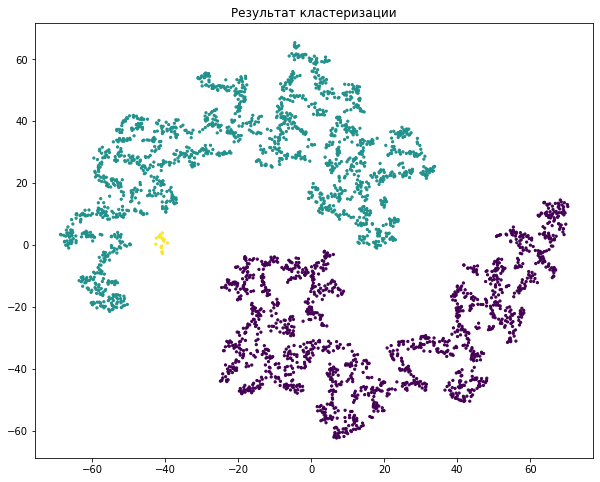

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y_pred_db, s=5)
plt.title("Результат кластеризации")
plt.show()

## 6. Получение результата

In [51]:
result_cookie = pd.DataFrame()
result_cookie['cookie_id'] = remain.cookie_id
result_cookie['cookie_id_class'] = y_pred_db
result_cookie['cookie_id_class'] = result_cookie['cookie_id_class']+2

In [52]:
result_cookie.cookie_id_class.value_counts()

3    1641
2    1539
4      20
Name: cookie_id_class, dtype: int64

In [53]:
clasterization = pd.concat([result_cookie, done])

C:\Users\frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [54]:
clasterization

cookie_id  cookie_id_class  \
44      00103b4c-f028-46f5-8586-ec0892372816              2.0   
184     0041f39e-5923-485c-a655-02e319a46207              3.0   
199     0048491f-5de0-43e7-8cf3-ca3d02f3046c              2.0   
203     004a53a8-ca04-45e4-a647-6002602fab2c              3.0   
300     007052ce-b7d7-4079-8c49-4a6f3dc7862f              3.0   
...                                      ...              ...   
167117  fffe5724-d548-4cc6-a54c-bc456afd2f8b              NaN   
167118  fffee79b-67b9-4d2c-9a43-5f240cc3d448              NaN   
167119  ffff0cdd-9cab-4f94-a587-a8562d880b10              NaN   
167120  ffff21bf-6fc5-40c7-aea5-87c0194ac0c2              NaN   
167121  ffff6957-fb3d-43b8-b3a2-e5d78d63d75c              NaN   

        session_id_class  
44                   NaN  
184                  NaN  
199                  NaN  
203                  NaN  
300                  NaN  
...                  ...  
167117               0.0  
167118               0.0  
167119               0.0  
167120               1.0  
167121               0.0  

[167122 rows x 3 columns]

Итоговая таблица содержит 167 122 пользователя, что соответствует изначальным данным.

Распределение классов:

In [55]:
clasterization.cookie_id_class.value_counts()

3.0    1641
2.0    1539
4.0      20
Name: cookie_id_class, dtype: int64

## 7. Выводы и обоснования

Матрица признаков была довольно большой, поэтому первым делом нужно было снизить ее размерность. PCA - простой метод, он дал быстрый и четкий результат, поэтому было принято использовать его.

Далее, для кластеризации сессий я выбрала алгоритм K-means. На больших данных он работает гораздо быстрее, чем тот же DBSCAN или другие алгоритмы. К тому же форма кластеров была настолько понятной, что алгоритм K-means хорошо справился.

Как мы помним, у одного человека могло быть несколько сессий. Поэтому, если все сессии человека принадлежали к одному классу, то я выделила соответственно 2 класса, "0" и "1". Таких людей получилось 163 922 - это большая часть. 

На этом можно было бы остановиться и выделить всех остальных в третий класс, но я решила поработать с данными еще и найти дополнительные взаимосвязи. Осталось кластеризовать 3 200 пользователей.

Методом PCA красиво снизить размерность не удалось и пришлось использовать метод t-SNE. Для снижения размерности матрицы с 167 122 строками этот метод был слишком долгим. А на 3 200 строках он дал красивое визуальное разделение на классы.

Для кластеризации оставшихся людей я использовала алгоритм DBSCAN. Он показывает хорошие результаты на искривленных классах и классах произвольной формы (в отличие от K-means, который просто разделил бы пополам). Поэтому DBSCAN хорошо справился с моими кластерами формы "Инь-Янь".

В конечном итоге набор 167 122 пользователей удалось разбить на 5 классов.

Весь представленный алгоритм структурирован так, что работает довольно быстро: файл можно запустить за 3 минуты.